# 블로그 설명

해당 자료에 대한 설명은 아래 블로그에 올려두었습니다.
- https://lsjsj92.tistory.com/597

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from keras.layers import Input, Embedding, Dense, Flatten, Dropout, SpatialDropout1D, Activation, concatenate
from keras.optimizers import Adam, SGD
from keras.layers.advanced_activations import ReLU, PReLU, LeakyReLU, ELU
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from tensorflow.keras.utils import plot_model

In [2]:
COLUMNS = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status", 
    "occupation", "relationship", "race", "gender", "capital_gain", "capital_loss", 
    "hours_per_week", "native_country", "income_bracket"
]

CATEGORICAL_COLUMNS = [
    "workclass", "education", "marital_status", "occupation", "relationship", 
    "race", "gender", "native_country"
]

CONTINUOUS_COLUMNS = [
    "age", "education_num", "capital_gain", "capital_loss", "hours_per_week"
]

# 데이터 load

In [3]:
train_data = pd.read_csv('./data/adult.data', names=COLUMNS)

In [4]:
print(train_data.shape)
train_data.head()

(32561, 15)


age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race   gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country income_bracket  
0          2174             0              40   United-States          <=50K  
1             0             0              13   United-States          <=50K  
2             0             0              40   United-States          <=50K  
3             0             0              40   United-States          <=50K  
4             0             0              40            Cuba          <=50K

In [5]:
train_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

In [6]:
test_data = pd.read_csv('./data/adult.test', skiprows=1, names=COLUMNS)

In [7]:
print(test_data.shape)
test_data.head()

(16281, 15)


age   workclass  fnlwgt      education  education_num       marital_status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race   gender  capital_gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital_loss  hours_per_week  native_country income_bracket  
0             0              40   United-States         <=50K.  
1             0              50   United-States         <=50K.  
2             0              40   United-States          >50K.  
3             0              40   United-States          >50K.  
4             0              30   United-States         <=50K.

In [8]:
test_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

# 데이터 concat

In [9]:
data = pd.concat([train_data, test_data])

In [10]:
print(data.shape)
data.head()

(48842, 15)


age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race   gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country income_bracket  
0          2174             0              40   United-States          <=50K  
1             0             0              13   United-States          <=50K  
2             0             0              40   United-States          <=50K  
3             0             0              40   United-States          <=50K  
4             0             0              40            Cuba          <=50K

## 라벨 값 생성

In [11]:
data['label'] = data['income_bracket'].apply(lambda x : ">50K" in x).astype(int)

In [12]:
data.iloc[10:15]

age   workclass  fnlwgt      education  education_num  \
10   37     Private  280464   Some-college             10   
11   30   State-gov  141297      Bachelors             13   
12   23     Private  122272      Bachelors             13   
13   32     Private  205019     Assoc-acdm             12   
14   40     Private  121772      Assoc-voc             11   

         marital_status        occupation    relationship  \
10   Married-civ-spouse   Exec-managerial         Husband   
11   Married-civ-spouse    Prof-specialty         Husband   
12        Never-married      Adm-clerical       Own-child   
13        Never-married             Sales   Not-in-family   
14   Married-civ-spouse      Craft-repair         Husband   

                   race   gender  capital_gain  capital_loss  hours_per_week  \
10                Black     Male             0             0              80   
11   Asian-Pac-Islander     Male             0             0              40   
12                White   Female             0             0              30   
13                Black     Male             0             0              50   
14   Asian-Pac-Islander     Male             0             0              40   

    native_country income_bracket  label  
10   United-States           >50K      1  
11           India           >50K      1  
12   United-States          <=50K      0  
13   United-States          <=50K      0  
14               ?           >50K      1

In [13]:
data.drop('income_bracket', axis = 1, inplace=True)

In [14]:
data.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race   gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  label  
0          2174             0              40   United-States      0  
1             0             0              13   United-States      0  
2             0             0              40   United-States      0  
3             0             0              40   United-States      0  
4             0             0              40            Cuba      0

In [15]:
y = data['label'].values
data.drop('label', axis = 1, inplace=True)

In [16]:
data.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race   gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  
0          2174             0              40   United-States  
1             0             0              13   United-States  
2             0             0              40   United-States  
3             0             0              40   United-States  
4             0             0              40            Cuba

## 카테고리 값들을 숫자로 변경

In [17]:
for c in CATEGORICAL_COLUMNS:
    le = LabelEncoder()
    data[c] = le.fit_transform(data[c])

In [18]:
data.head()

age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  gender  capital_gain  capital_loss  \
0           1             1     4       1          2174             0   
1           4             0     4       1             0             0   
2           6             1     4       1             0             0   
3           6             0     2       1             0             0   
4          10             5     2       0             0             0   

   hours_per_week  native_country  
0              40              39  
1              13              39  
2              40              39  
3              40              39  
4              40               5

# 다시 trian, test로 구분 

In [19]:
train_size = len(train_data)

In [20]:
X_train = data.iloc[:train_size]
y_train = y[:train_size]
X_test = data.iloc[train_size:]
y_test = y[train_size:]

In [21]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

32561 32561 16281 16281


## 카테고리 값들과 연속값들을 뽑아냄

In [22]:
X_train_category = np.array(X_train[CATEGORICAL_COLUMNS])
X_test_category = np.array(X_test[CATEGORICAL_COLUMNS])
X_train_countinue = np.array(X_train[CONTINUOUS_COLUMNS], dtype='float64')
X_test_countinue = np.array(X_test[CONTINUOUS_COLUMNS], dtype='float64')

In [23]:
print( X_train_category[:1] )
print(X_test_category[:1])
print(X_train_countinue[:1])
print(X_test_countinue[:1])

[[ 7  9  4  1  1  4  1 39]]
[[ 4  1  4  7  3  2  1 39]]
[[  39.   13. 2174.    0.   40.]]
[[25.  7.  0.  0. 40.]]


## 정규화

In [24]:
scaler = StandardScaler()
X_train_countinue = scaler.fit_transform(X_train_countinue)
X_test_countinue = scaler.transform(X_test_countinue)

In [25]:
print(X_train_countinue[:1])
print(X_test_countinue[:1])

[[ 0.03067056  1.13473876  0.1484529  -0.21665953 -0.03542945]]
[[-0.99570562 -1.19745882 -0.14592048 -0.21665953 -0.03542945]]


## Polynomial 하게 바꿔줌 (비선형적인 설정으로 선형 회귀를 확장하는 방법. 즉 다항식 함수로 바꿔줌)

카테고리 값을 Polynomial로 바꿔준다.

In [26]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_category_poly = poly.fit_transform(X_train_category)
X_test_category_poly = poly.transform(X_test_category)

In [27]:
print( X_train_category_poly[:1] )
print(X_test_category_poly[:1])

[[  1.   7.   9.   4.   1.   1.   4.   1.  39.  63.  28.   7.   7.  28.
    7. 273.  36.   9.   9.  36.   9. 351.   4.   4.  16.   4. 156.   1.
    4.   1.  39.   4.   1.  39.   4. 156.  39.]]
[[  1.   4.   1.   4.   7.   3.   2.   1.  39.   4.  16.  28.  12.   8.
    4. 156.   4.   7.   3.   2.   1.  39.  28.  12.   8.   4. 156.  21.
   14.   7. 273.   6.   3. 117.   2.  78.  39.]]


In [28]:
n = np.array([[1,2,3]])
poly2 = PolynomialFeatures(degree=2, interaction_only=True)
print(poly.fit_transform(n))

[[1. 1. 2. 3. 2. 3. 6.]]


## 모델 설계

In [29]:
def get_deep_model():

    category_inputs = []
    category_embeds = []
    # 카테고리컬 데이터 임베딩
    for i in range(len(CATEGORICAL_COLUMNS)):
        input_i = Input(shape=(1,), dtype='int32')
        dim = len(np.unique(data[CATEGORICAL_COLUMNS[i]]))
        embed_dim = int(np.ceil(dim ** 0.5)) # embedding 차원을 0.5배 정도로 해서 한다.
        embed_i = Embedding(dim, embed_dim, input_length=1)(input_i)
        flatten_i = Flatten()(embed_i)
        category_inputs.append(input_i)
        category_embeds.append(flatten_i)
    # continuous 데이터 input
    continue_input = Input(shape=(len(CONTINUOUS_COLUMNS),))
    continue_dense = Dense(256, use_bias=False)(continue_input)
    # category와 continue를 합침
    concat_embeds = concatenate([continue_dense] + category_embeds)
    concat_embeds = Activation('relu')(concat_embeds)
    bn_concat = BatchNormalization()(concat_embeds)

    fc1 = Dense(512, use_bias=False)(bn_concat)
    relu1 = ReLU()(fc1)
    bn1 = BatchNormalization()(relu1)
    fc2 = Dense(256, use_bias=False)(bn1)
    relu2 = ReLU()(fc2)
    bn2 = BatchNormalization()(relu2)
    fc3 = Dense(128)(bn2)
    relu3 = ReLU()(fc3)
    
    return category_inputs, continue_input, relu3

In [30]:
def get_wide_model():
    dim = X_train_category_poly.shape[1]
    return Input(shape=(dim,))

In [31]:
category_inputs, continue_input, deep_model = get_deep_model()
wide_model = get_wide_model()

## wide 모델과 deep model을 합쳐준다. 

In [32]:
out_layer = concatenate([deep_model, wide_model])
inputs = [continue_input] + category_inputs + [wide_model]
output = Dense(1, activation='sigmoid')(out_layer)
model = Model(inputs=inputs, outputs=output)

In [33]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
_______________________________________________________________________________________

In [34]:
checkpoint = ModelCheckpoint(filepath='./data/wide-deep.h5', monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

## 입력 데이터

- conti 데이터 -> category 데이터 -> poly data 순으로 입력으로 넣어준다.


In [35]:
input_data = [X_train_countinue] + [X_train_category[:, i] for i in range(X_train_category.shape[1])] + [X_train_category_poly]

In [36]:
epochs = 30
optimizer ='adam'
batch_size = 128

In [37]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(input_data, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.15, callbacks=[checkpoint, early_stopping])

Epoch 1/30
212/217 [============================>.] - ETA: 0s - loss: 3.8606 - accuracy: 0.7990
Epoch 00001: val_loss improved from inf to 2.42448, saving model to ./data/wide-deep.h5
217/217 [==============================] - 1s 4ms/step - loss: 3.8025 - accuracy: 0.7989 - val_loss: 2.4245 - val_accuracy: 0.6692
Epoch 2/30
211/217 [============================>.] - ETA: 0s - loss: 0.6523 - accuracy: 0.8123
Epoch 00002: val_loss improved from 2.42448 to 0.88378, saving model to ./data/wide-deep.h5
217/217 [==============================] - 1s 4ms/step - loss: 0.6471 - accuracy: 0.8129 - val_loss: 0.8838 - val_accuracy: 0.7204
Epoch 3/30
211/217 [============================>.] - ETA: 0s - loss: 0.4355 - accuracy: 0.8259
Epoch 00003: val_loss improved from 0.88378 to 0.40923, saving model to ./data/wide-deep.h5
217/217 [==============================] - 1s 4ms/step - loss: 0.4342 - accuracy: 0.8263 - val_loss: 0.4092 - val_accuracy: 0.8174
Epoch 4/30
210/217 [===========================

# Eval

In [38]:
eval_input_data = [X_test_countinue] + [X_test_category[:, i] for i in range(X_test_category.shape[1])] + [X_test_category_poly]

In [39]:
loss, acc = model.evaluate(eval_input_data, y_test)

509/509 [==============================] - 0s 787us/step - loss: 0.3438 - accuracy: 0.8434


In [40]:
print(f'test_loss: {loss} - test_acc: {acc}')

test_loss: 0.3437998592853546 - test_acc: 0.8433757424354553


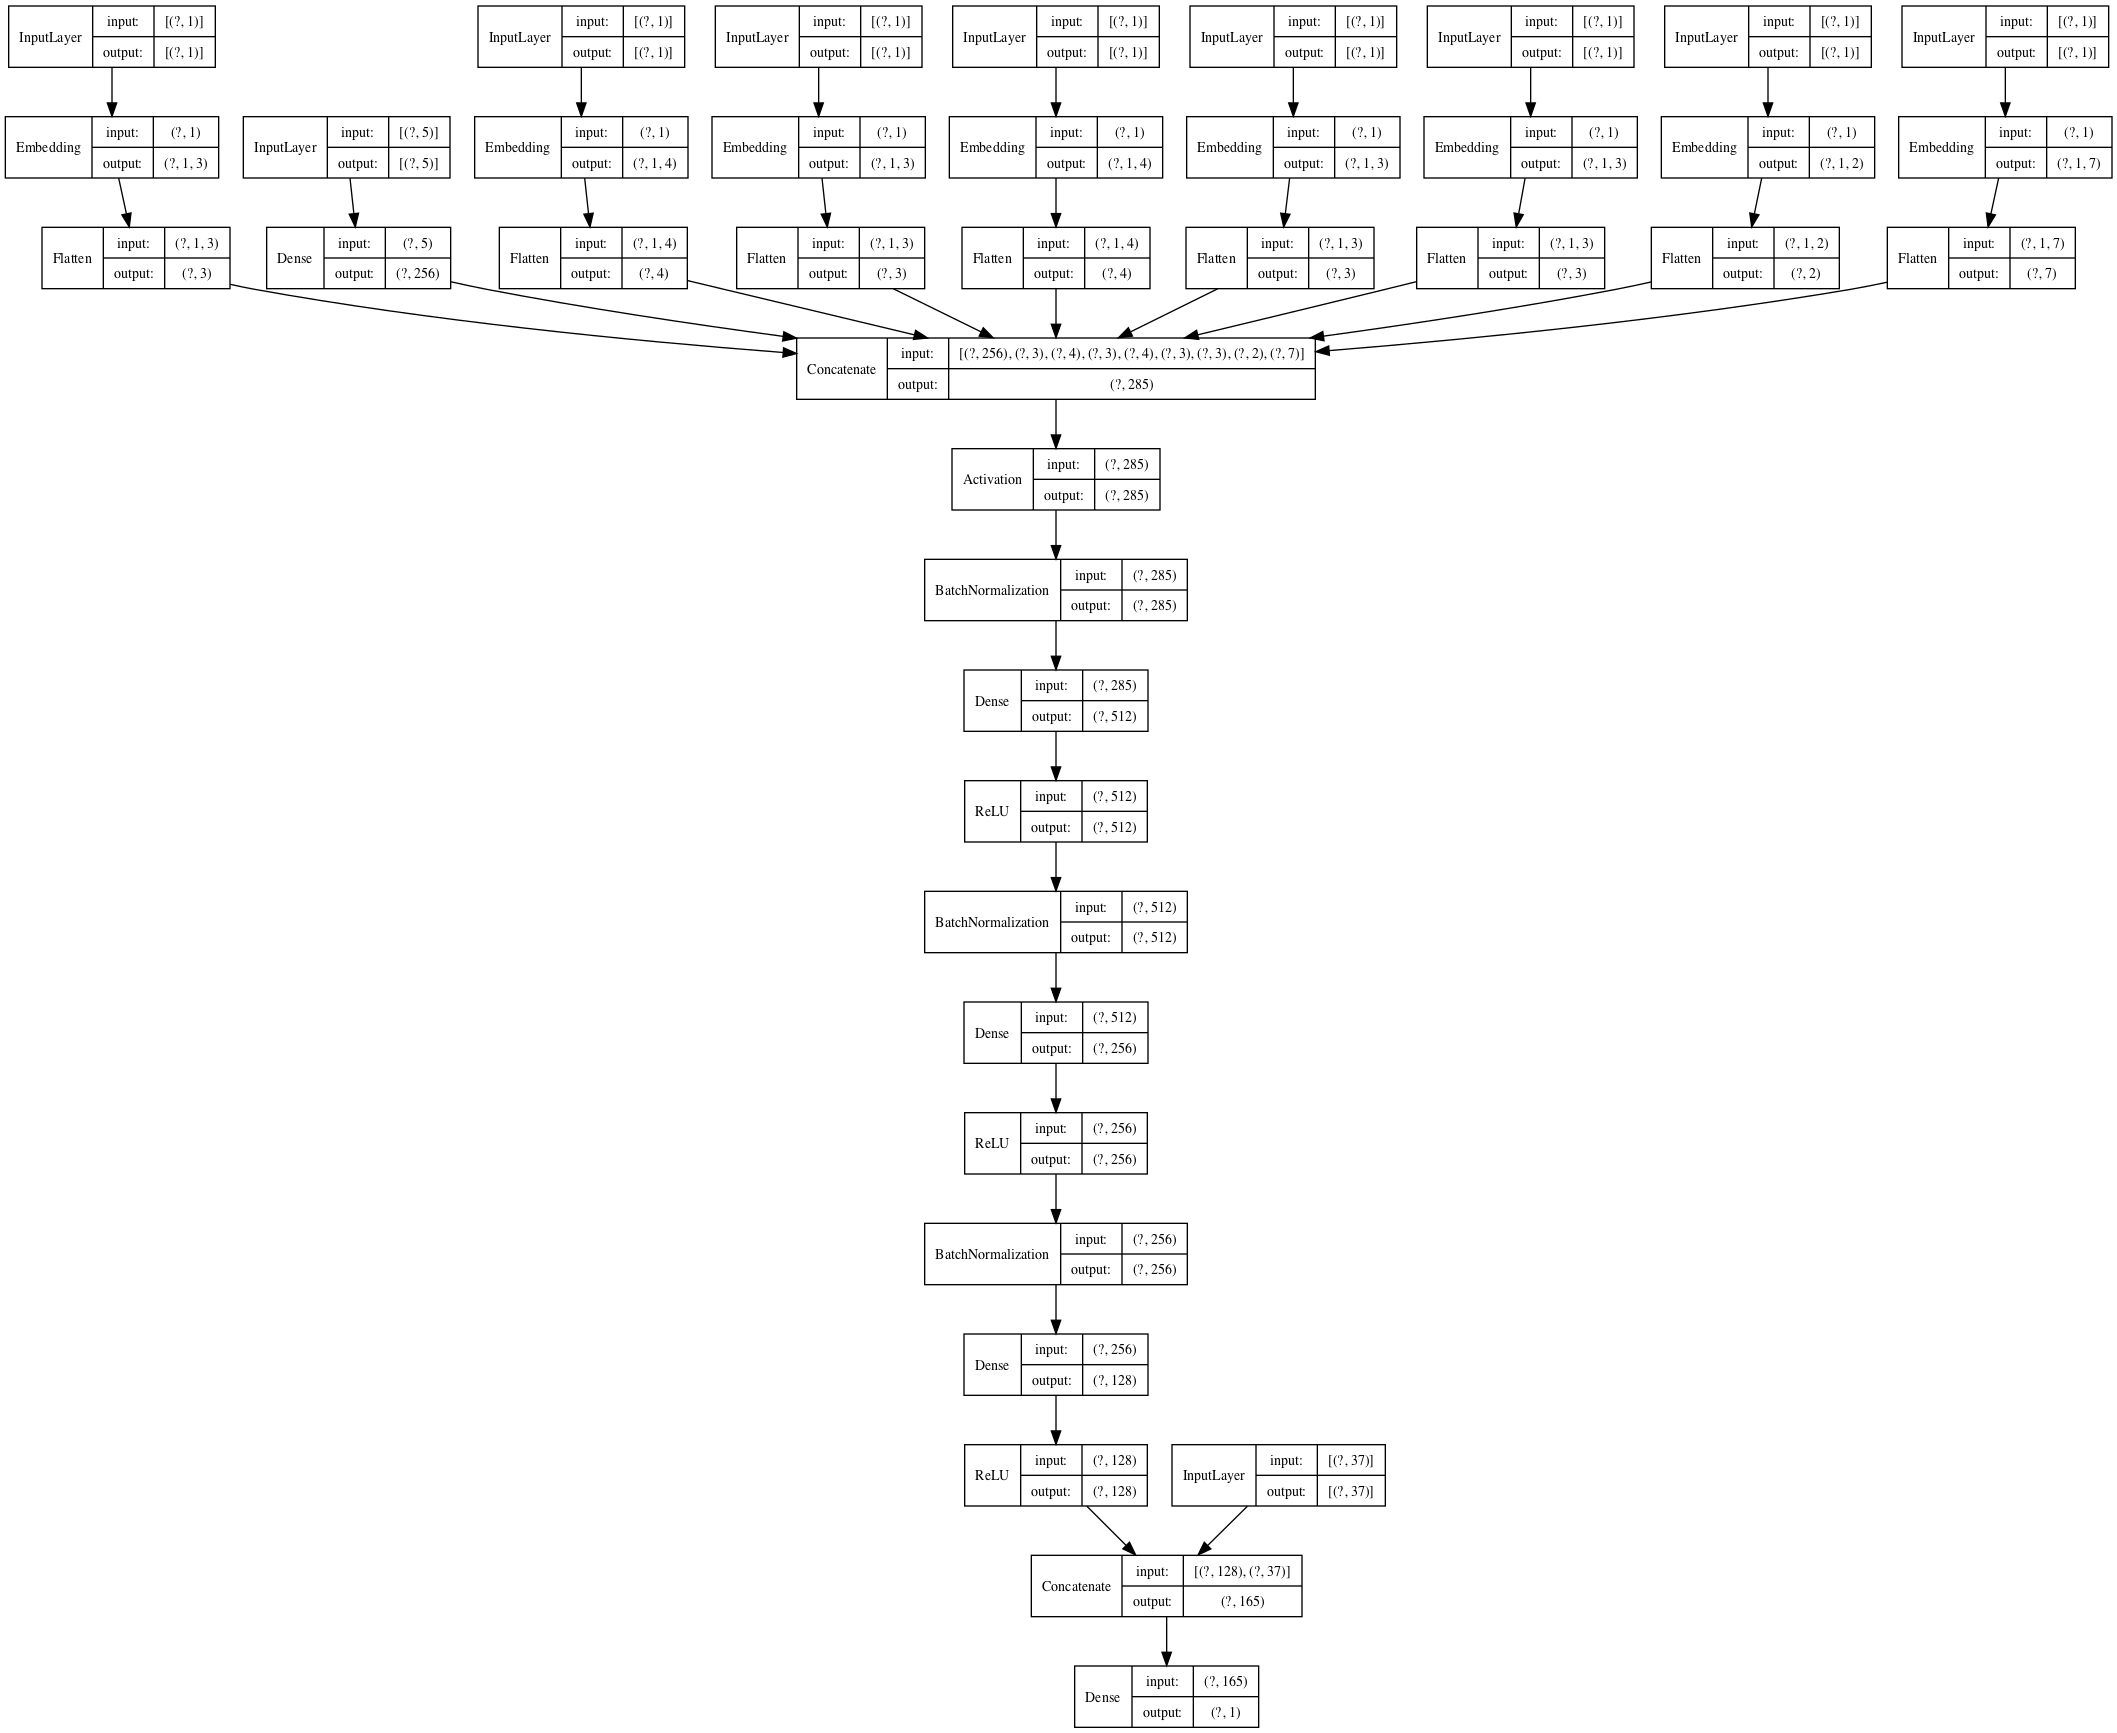

In [41]:
plot_model(model, to_file='./data/model.png', show_shapes=True, show_layer_names=False)